In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [9, 5]

# Data Story for Capstone 1: Tennis

## Initial Goals

I am heading into this step of the process with only one question in mind. What makes a top professional tennis player great? Do they serve faster? Are they mentally tougher? Do they wear nicer clothes? Perhaps I can only answer some of these questions, but I'll be going in with an open mind and explore what the data allows. 

## Data Introduction

The dataset I chose can be found [here.](https://github.com/JeffSackmann/tennis_atp) It contains a fairly complete record of official statistics, ranking data, and match results relating to professional men's tennis players. Most of the data dates back to the beginning of the Open Era in 1968. Before that time the professional and amateur circuits were separate. Most records count only tournaments played in the Open Era.

## Data Wrangling

Prior to this notebook, all data has been cleaned and trimmed for the purpose of analysis. I have defined a "top" player as any professional who has reached at least a ranking of 100 in their career. I may loosen this requirement later, depending on the results I discover.

## Player Data

The first of three csv files, atp_top_100_players.csv contains a list of top players and some basic identifying information. The file details their name, which hand they hold the racquet in, their birthdate, and the country they represent. 

In [2]:
# Top 100 players
players = pd.read_csv('Resources/tennis_clean/atp_top_100_players.csv', index_col='player_id', parse_dates=['birthdate'])
players.head()

,name_first,name_last,hand,birthdate,country
player_id,,,,,
100011,Torben,Ulrich,L,1932-10-04,DEN
100016,Ken,Rosewall,R,1934-11-02,AUS
100022,Roy,Emerson,R,1936-11-03,AUS
100025,Barry,Phillips Moore,R,1937-07-09,AUS
100026,Andres,Gimeno,R,1937-08-03,ESP


## Ranking Data

The next file, atp_top_100_rankings.csv, contains a record of ranking data for all top players at the start of each week. The player_id and ranking_date columns form a unique index, and each row has the player's rank, ranking points, and age \(in days\) for that given date.

In [3]:
rankings = pd.read_csv('Resources/tennis_clean/atp_top_100_rankings.csv', index_col=['player_id', 'ranking_date'],
                       parse_dates=['ranking_date'])
rankings['player_delta'] = pd.to_timedelta(rankings.player_age)
rankings['player_age'] = pd.to_timedelta(rankings.player_age).dt.days
rankings.head()

player_rank  points  player_age player_delta
player_id ranking_date                                              
100011    1973-08-27            114     NaN     14937.0   14937 days
          1973-09-17            114     NaN     14958.0   14958 days
          1973-10-01            101     NaN     14972.0   14972 days
          1973-10-15             96     NaN     14986.0   14986 days
          1973-11-05            102     NaN     15007.0   15007 days

## Match Data

The final csv file is also the largest. atp_top_100_matches.csv contains a record of every match played by top players, and the accompanying match statistics. There are nearly 50 columns which describe tournament information, the result of the match, and match statistics such as how many points were played and won. Many of these statistics were generated from the small subset of statistics that were contained in the original dataset.

Additionally, it is important to note that each row contains information for only one of the players in the match. If the opponent is also a top 100 player, then their statistics will also be contained in the dataset as another row.

In [4]:
matches = pd.read_csv('Resources/tennis_clean/atp_top_100_matches.csv',
                      index_col=['player_id', 'tournament_id', 'match_id'],
                       parse_dates=['tournament_date'])
matches.head(3)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


tournament_date  opponent_id    player_name  \
player_id tournament_id match_id                                               
100011    1968-401      4.0           1968-02-08     100186.0  Torben Ulrich   
                        8.0           1968-02-08     100028.0  Torben Ulrich   
          1968-D013     1.0           1968-04-28     100119.0  Torben Ulrich   

                                   opponent_name  \
player_id tournament_id match_id                   
100011    1968-401      4.0        Jeff Borowiak   
                        8.0       Manuel Santana   
          1968-D013     1.0         Ilie Nastase   

                                               tournament_name surface  \
player_id tournament_id match_id                                         
100011    1968-401      4.0                   Philadelphia WCT  Carpet   
                        8.0                   Philadelphia WCT  Carpet   
          1968-D013     1.0       Davis Cup EUR R1: ROU vs DEN    Clay   

                                  draw_size tournament_level seed entry  ...  \
player_id tournament_id match_id                                         ...   
100011    1968-401      4.0            16.0                A  NaN   NaN  ...   
                        8.0            16.0                A  NaN   NaN  ...   
          1968-D013     1.0             4.0                D  NaN   NaN  ...   

                                  past_year_return_points_won_percentage  \
player_id tournament_id match_id                                           
100011    1968-401      4.0                                          0.0   
                        8.0                                          0.0   
          1968-D013     1.0                                          0.0   

                                 past_year_first_serves_won_percentage  \
player_id tournament_id match_id                                         
100011    1968-401      4.0                                        0.0   
                        8.0                                        0.0   
          1968-D013     1.0                                        0.0   

                                  past_year_second_serves_won_percentage  \
player_id tournament_id match_id                                           
100011    1968-401      4.0                                          0.0   
                        8.0                                          0.0   
          1968-D013     1.0                                          0.0   

                                 past_year_first_serve_return_points_won_percentage  \
player_id tournament_id match_id                                                      
100011    1968-401      4.0                                                     0.0   
                        8.0                                                     0.0   
          1968-D013     1.0                                                     0.0   

                                  past_year_second_serve_return_points_won_percentage  \
player_id tournament_id match_id                                                        
100011    1968-401      4.0                                                     0.0     
                        8.0                                                     0.0     
          1968-D013     1.0                                                     0.0     

                                  past_year_break_points_won_percentage  \
player_id tournament_id match_id                                          
100011    1968-401      4.0                                         0.0   
                        8.0                                         0.0   
          1968-D013     1.0                                         0.0   

                                  past_year_points_won_percentage  winrate  \
player_id tournament_id match_id                                             
100011    1968-401      4.0                         

# Data Questions

Given each of these data files, what questions can be asked to better describe a "top" player?

In [ ]:
# Professional tennis players have originated from over 200 countries.

players.country.unique().size

In [ ]:
players.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of professional tennis players')

In [ ]:
players[players.birthdate < '1950'].birthdate.count()

In [ ]:
players[players.birthdate > '1990'].country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of professional tennis players born after 1990')

In [ ]:
top_100_players.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of top 100 professional tennis players')
plt.savefig('plot.jpg')

In [ ]:
top_100_players[top_100_players.birthdate > '1990'].country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of top 100 professional tennis players born after 1990')
plt.savefig('plot.jpg')

### 1. How many players have ever reached a rank of 100 or higher?

### A: 1092

This answer surprised me. In 50 years, only roughly 1000 tennis players have ever reached a top 100 distinction. 

In [5]:
# Number of players who have reached a rank of 100 or above, all time.
player_count = players.shape[0]
player_count

1092

### 2. How many players born in a given year reach the top 100?

### A: ~16 per birth year

Each birth year has a "class" of around 16 players.

In [6]:
# Average number of top 100 players per birth year.
players.groupby(players.birthdate.dt.year).size().mean()

15.941176470588236

### 3. How many players reach the top 100 for the first time each year?

### A: ~22 new top 100 players each year.

In a given year, there is a churn of around 22 players. Not all players stay in the top 100 for long once they enter, but even a week at the top is a significant achievement.

In [7]:
# Find out how many players enter the top 100 for the first time in a given year.
# Group by ranking < 100, get first, then group by ranking_date.year

date_entered_top_100 = rankings[rankings.player_rank <= 100].reset_index('ranking_date') \
                                                                  .groupby('player_id')  \
                                                                  .first()
year_entered_top_100 = date_entered_top_100.groupby(date_entered_top_100.ranking_date.dt.year)

# 1973 is the first year this dataset begins, so the first date for many professionals is in that year.
# To account for this, 1973 is exluded from the mean calculation
year_entered_top_100.size()[1:].mean()

22.022727272727273

### 4. How many ranking points does it take to enter the top 100?

### A: On average 593

The ranking system changed in 2009, so only years after that date were accounted for.

In [8]:
# The ranking points required to enter the top 100, on average. Note that in 2009 the ranking system changed.
# Since that year, the average has remained steady, and will be a good number to remember.

year_entered_top_100.mean().loc[2009:, 'points'].mean()

593.2405516200971

### 5. At what age does the average player enter the top 100?

### A: Since the 1990s, that number has increased steadily.

It seems that in recent years, players entering the top 100 are older.

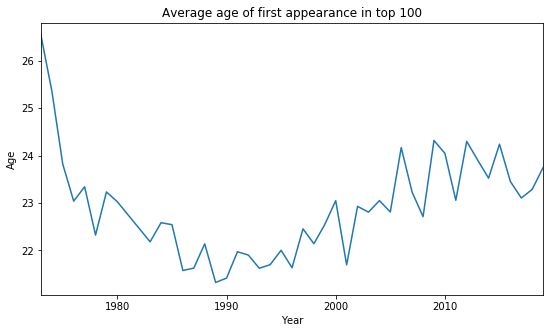

In [9]:
# The average age a player enters the top 100. Since 1989 the average age has been steadily increasing.

_ = (year_entered_top_100.mean().player_age / 365).plot()
_ = plt.xlabel('Year')
_ = plt.ylabel('Age')
_ = plt.title('Average age of first appearance in top 100')

To investigate this further, I looked into the average age of all top 100 players.
The top 100 has been getting older consistently since 2005. In fact, the growth in the last few years has been dramatic. What is causing this trend? Are players staying in top shape for longer? Is there a generational talent gap? It may be difficult for young players to break into an already exclusive club.

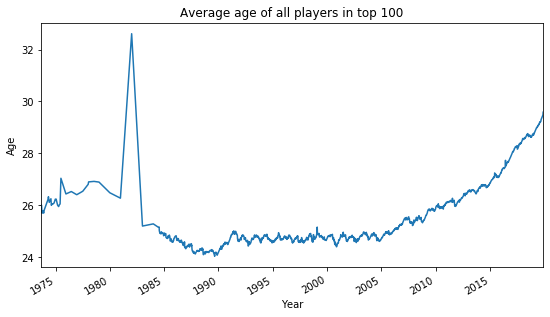

In [10]:
# The average age of all players in the top 100.
# Note that ranking data is sparse before 1984.
# The trend of increasingly older players holds true, and the rate is only getting faster.
# Is the younger generation weaker than before, or are the older players lasting longer?
# This will be an important question to consider carefully.

_ = (rankings.groupby('ranking_date').mean().player_age / 365).plot()
_ = plt.xlabel('Year')
_ = plt.ylabel('Age')
_ = plt.title('Average age of all players in top 100')

### 6. How many top 100 players are born in a given month?

### A: It seems that top 100 players are more likely to have a birthday early in the year.

The sample size here is small. Does the trend hold among all professional tennis players?

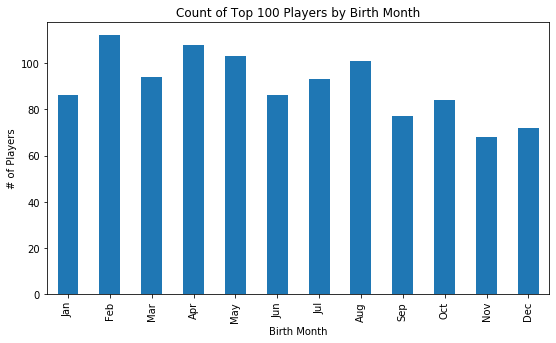

In [11]:
# Number of top 100 players by birth month.
players.groupby(players.birthdate.dt.month).size().plot(kind='bar')
_ = plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
_ = plt.xlabel('Birth Month')
_ = plt.ylabel('# of Players')
_ = plt.title('Count of Top 100 Players by Birth Month')

Surprisingly, the data from all players shows an even clearer trend. After some research on global birth rates, it seems that the summer months are the months with the most births. There may be a reason that a player born in the earlier part of the year is more likely to take up the sport and succeed. I will not explore this for my capstone project, but it would be an interesting question to return to.

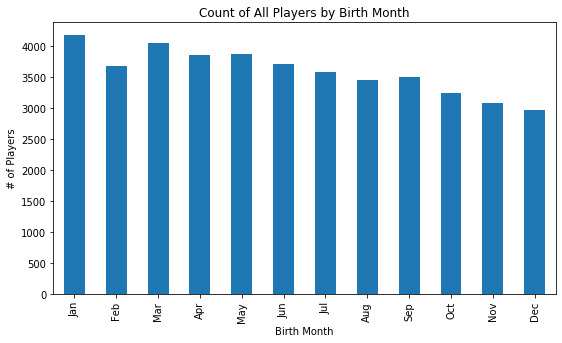

In [12]:
# Number of all pro players by birth month. Does the trend hold?
all_players = pd.read_csv('Resources/tennis_clean/atp_players.csv', index_col='player_id', parse_dates=['birthdate'])
all_players.groupby(all_players.birthdate.dt.month).size().plot(kind='bar')
_ = plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
_ = plt.xlabel('Birth Month')
_ = plt.ylabel('# of Players')
_ = plt.title('Count of All Players by Birth Month')

### 7. What percentage of top 100 players play with their left hand?

### A: ~14% of top 100 players play left-handed. 

In tennis, it is widely assumed that playing left-handed gives you an advantage, as the spin generated from a left-handed serve is opposite that of the right-handed serve. As players play vs. mostly right handed opponents, the unexpected spin gives the left-handed player an advantage. Or so the story goes...

In [13]:
# Percentage of top 100 players by handedness
handedness = players.groupby('hand').size()
handedness['L'] / player_count, handedness['R'] / player_count

(0.1401098901098901, 0.8543956043956044)

Looking into the data from all professional players, it seems as though only roughly 8% of players play left-handed. Is 14% a significant enough jump from 8%? This question will be further explored in the statistical methods report.

In [14]:
# Percentage of all players by handedness
# Note that the number of unknowns is high, so the total only accounts for players with a known handedness
all_handedness = all_players.groupby('hand').size()
all_total = all_handedness['L'] + all_handedness['R']
all_handedness['L'] / all_total, all_handedness['R'] / all_total

(0.08226933269091785, 0.9177306673090821)

### 8. What is the highest rank each player has reached?

### A: Reaching the top 100 is no strong guarantee of higher success. 

After plotting the data, there seems to be a uniform distribution among all ranks. An exception is rank 1, which would make sense as players who reach this rank have nowhere higher to climb.

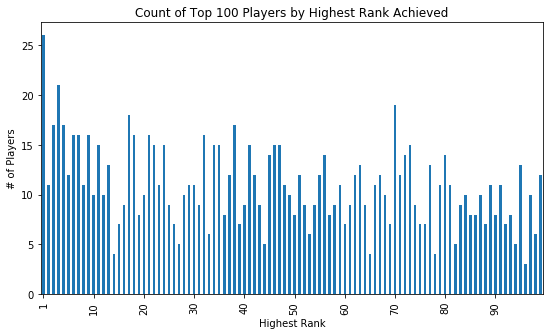

In [15]:
rankings['player_rank'].groupby('player_id').min().value_counts().sort_index().plot(kind='bar')
_ = plt.xticks(np.arange(10) * 10, [1, 10, 20, 30, 40, 50, 60, 70, 80, 90])
_ = plt.xlabel('Highest Rank')
_ = plt.ylabel('# of Players')
_ = plt.title('Count of Top 100 Players by Highest Rank Achieved')

However, the numbers do show a slight increase in the likelihood of reaching higher ranks. 55% of all top players have reached the top 50, and 15% of all top players have reached the top 10. Both results are 5% higher than the expected value.

In [16]:
# Percentage of Top 100 Players who never made top 50, or top 10.
player_highest_rank = rankings['player_rank'].groupby('player_id').min()
not_top_50 = player_highest_rank[player_highest_rank > 50].size
not_top_10 = player_highest_rank[player_highest_rank > 10].size
print(player_count - not_top_50, player_count - not_top_10)
not_top_50 / player_count, not_top_10 / player_count

613 163


(0.43864468864468864, 0.8507326007326007)

### 9. Which player has the most weeks at rank 1?

### A: Roger Federer

I could spend days just listing the many records Roger Federer holds. It's nice to know that many of these records can be computed from the dataset. However, the dataset does not contain complete data for many of the older decades, so some of the older players will have a lower number of weeks at number one than in reality.

In [17]:
# Top 10 Players by Weeks at Number 1

top_10_weeks_at_number_1 = rankings[rankings.player_rank == 1].groupby('player_id').size().nlargest(10)
top_10_weeks_at_number_1_players = players.loc[top_10_weeks_at_number_1.index][['name_first', 'name_last']]
top_10_weeks_at_number_1_players['weeks_at_number_1'] = top_10_weeks_at_number_1
top_10_weeks_at_number_1_players.head(5)

,name_first,name_last,weeks_at_number_1
player_id,,,
103819,Roger,Federer,307
101948,Pete,Sampras,285
104925,Novak,Djokovic,246
100656,Ivan,Lendl,205
104745,Rafael,Nadal,186


### 10. How do the careers of top players compare?

To answer this question, I will look at two of the all-time greats, Roger Federer and Novak Djokovic. Both of these players are still active today. The plot below displays their respective ranking points by date. However, as a comparison between their careers this approach has two problems.

First, it ignores the significant change in ranking system after 2009. Looking at the plot, Roger Federer seems to never reach the same heights as Djokovic, despite having more weeks at number one. Why is this?

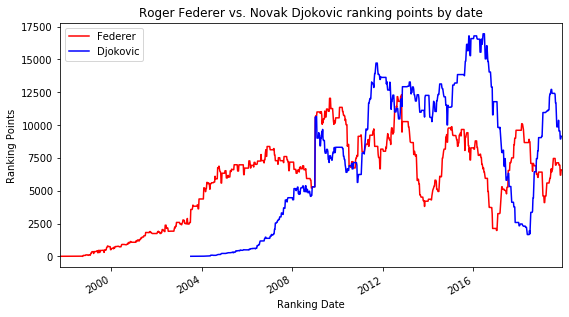

In [18]:
def player_id(first, last):
    return players.query('name_first == @first and name_last == @last').index[0]

_ = rankings.loc[player_id('Roger', 'Federer'), 'points'].plot(color='red')
_ = rankings.loc[player_id('Novak', 'Djokovic'), 'points'].plot(color='blue')
_ = plt.xlabel('Ranking Date')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Roger Federer vs. Novak Djokovic ranking points by date')
_ = plt.legend(['Federer', 'Djokovic'])

Looking at the transition between 2008 and 2009, Federer's ranking points jump by nearly double! However, no tournaments were played that week. The ranking system instead adjusted the points earned in the last year to the new values.

In [19]:
pd.DataFrame(rankings.loc[player_id('Roger', 'Federer'), 'points'])['Dec 29 2008' : 'Jan 05 2009']

,points
ranking_date,
2008-12-29,5305.0
2009-01-05,10610.0


 Doubling the ranking points of all players before 2009 gives a good approximation of this jump. 

In [20]:
ranking_system_overhaul_date = 2009
pre_2009 = rankings.query('ranking_date < @ranking_system_overhaul_date').index
rankings.loc[pre_2009, 'points'] *= 2

After the adjustment, Roger Federer's heights now equal those of Djokovic. However, there is another problem. Federer is 6 years older than Djokovic. How can we account for this difference?

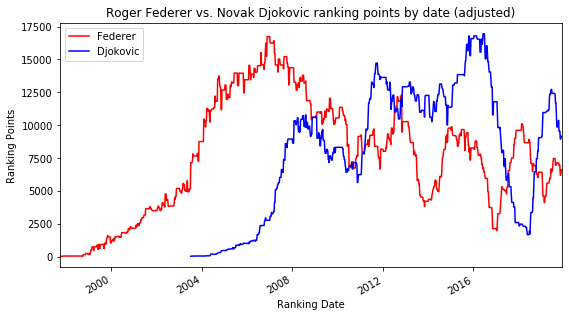

In [21]:
_ = rankings.loc[player_id('Roger', 'Federer'), 'points'].plot(color='red')
_ = rankings.loc[player_id('Novak', 'Djokovic'), 'points'].plot(color='blue')
_ = plt.xlabel('Ranking Date')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Roger Federer vs. Novak Djokovic ranking points by date (adjusted)')
_ = plt.legend(['Federer', 'Djokovic'])

To account for this difference, I instead plotted the ranking data against the age of the player at the time of the ranking. This allows us to see Federer's career "on top" of Djokovic's career. As you can see, they have had very similar careers up to this point. Will Djokovic have the longevity that Federer has had?

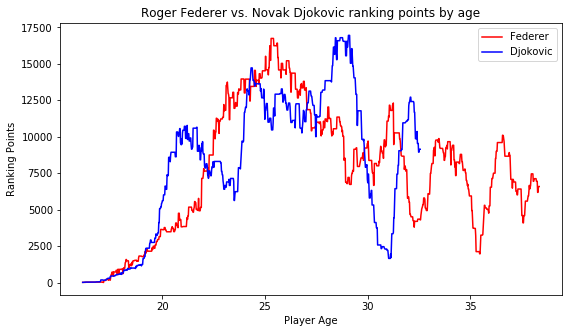

In [22]:
plt.plot(rankings.loc[player_id('Roger', 'Federer'), 'player_age'] / 365,
         rankings.loc[player_id('Roger', 'Federer'), 'points'], color='red')
plt.plot(rankings.loc[player_id('Novak', 'Djokovic'), 'player_age'] / 365,
         rankings.loc[player_id('Novak', 'Djokovic'), 'points'], color='blue')
_ = plt.xlabel('Player Age')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Roger Federer vs. Novak Djokovic ranking points by age')
_ = plt.legend(['Federer', 'Djokovic'])

### 11. At what age does a player peak?

### A: The average player reaches their highest ranking between the ages of 25-26.

To reach this conclusion, I first looked into the average ranking points of all players at a given age. My first attempt averaged all results per day, which created too many data points. The result below looks cluttered and has some large outliers on days with fewer data points. Only the mean aggregatation had any semblance of shape.

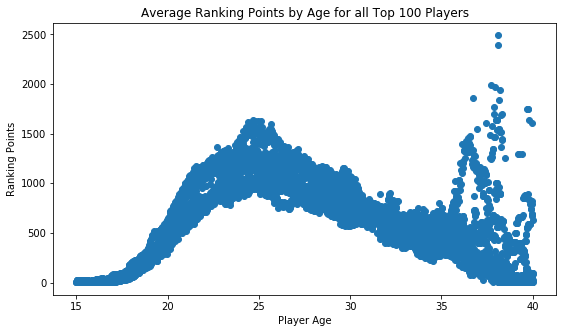

In [23]:
average_ranking_points = rankings.groupby('player_age').mean().loc[15 * 365 : 40 * 365]
_ = plt.scatter(average_ranking_points.index / 365, average_ranking_points.points)
_ = plt.xlabel('Player Age')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Average Ranking Points by Age for all Top 100 Players')

To fix this I resampled the data to a frequency of 30 days. This improved the result immensely. The consolidation of datapoints allowed me to look at the median, 1st quartile, and 3rd quartile of ranking points by age. There is a clear rise and fall pattern with a peak at the age of 25. However, this only looks at ranking points. Some players in the top 10 have thousands more ranking points than the players barely in range of the top 100. To account for this, I'll have to find a better method.

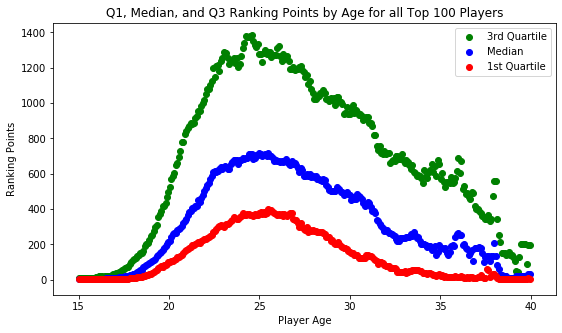

In [24]:
rankings_resampled = rankings.set_index('player_delta').resample('30D').quantile(.75)
rankings_resampled = rankings_resampled[(rankings_resampled.index.days / 365 > 15) &
                                        (rankings_resampled.index.days / 365 < 40)]
_ = plt.scatter(rankings_resampled.index.days / 365, rankings_resampled.points, c='green',
               label='3rd Quartile')

rankings_resampled = rankings.set_index('player_delta').resample('30D').quantile(.5)
rankings_resampled = rankings_resampled[(rankings_resampled.index.days / 365 > 15) &
                                        (rankings_resampled.index.days / 365 < 40)]
_ = plt.scatter(rankings_resampled.index.days / 365, rankings_resampled.points, c='blue',
               label='Median')

rankings_resampled = rankings.set_index('player_delta').resample('30D').quantile(.25)
rankings_resampled = rankings_resampled[(rankings_resampled.index.days / 365 > 15) &
                                        (rankings_resampled.index.days / 365 < 40)]
_ = plt.scatter(rankings_resampled.index.days / 365, rankings_resampled.points, c='red',
               label='1st Quartile')

_ = plt.xlabel('Player Age')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Q1, Median, and Q3 Ranking Points by Age for all Top 100 Players')

_ = plt.legend()

One solution can be done by means of a calculation. For each player, I found the date at which they reached their maximum ranking points. I then discarded any values in which the player's rank was not within the top 100. After all, any top 100 player should by definition have been ranked higher than 100 at their peak. Any inconsistencies are likely a result of incomplete data. Taking the average age of all such rows shows that the average player peak is between 25 and 26 years of age.

In [25]:
max_rankings_index = rankings.groupby('player_id').idxmax().points.dropna()
max_rankings = rankings.loc[max_rankings_index]
max_rankings[max_rankings.player_rank <= 100].mean().player_age / 365

25.777419669128392

To represent this graphically, I normalized all ranking points by dividing them by the corresponding player's maximum ranking points. This gives a number between 0 and 1, allowing every player to have equal weight when averaged together. The averaged result shows a clear rise, peak, and decline of the average player's career.

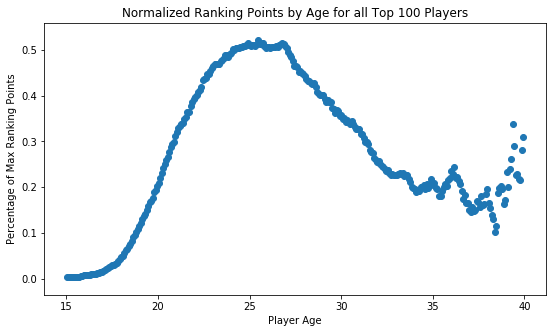

In [26]:
players['max_points'] = rankings.groupby('player_id').max().points
rankings_normalized = rankings.reset_index('ranking_date')
rankings_normalized['points_normalized'] = rankings_normalized.points /                      \
                                           players.loc[rankings_normalized.index].max_points

rankings_resampled = rankings_normalized.set_index('player_delta').resample('30D').mean()
rankings_resampled = rankings_resampled[(rankings_resampled.index.days / 365 > 15) &
                                        (rankings_resampled.index.days / 365 < 40)]
_ = plt.scatter(rankings_resampled.index.days / 365, rankings_resampled.points_normalized)
_ = plt.xlabel('Player Age')
_ = plt.ylabel('Percentage of Max Ranking Points')
_ = plt.title('Normalized Ranking Points by Age for all Top 100 Players')

How well does this translate to a practical example? Can we predict a player's decline just by their age? To test this, I overlaid Roger Federer's ranking points by age over the average normalized career. The similarity was surprising. Even the all time great himself is not immune to the career patterns of many players before him.

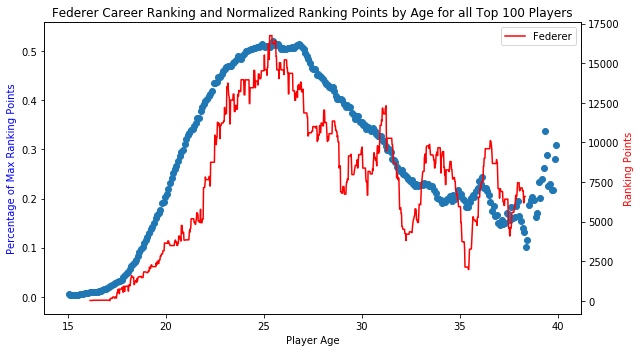

In [27]:
fig, ax1 = plt.subplots()

ax1.scatter(rankings_resampled.index.days / 365, rankings_resampled.points_normalized, color='tab:blue')
_ = ax1.set_xlabel('Player Age')
_ = ax1.set_ylabel('Percentage of Max Ranking Points', color='blue')

ax2 = ax1.twinx()

ax2.plot(rankings.loc[player_id('Roger', 'Federer'), 'player_age'] / 365,
         rankings.loc[player_id('Roger', 'Federer'), 'points'], color='red', label='Federer')

_ = ax2.set_ylabel('Ranking Points', color='red')

_ = plt.title('Federer Career Ranking and Normalized Ranking Points by Age for all Top 100 Players')
_ = plt.legend()

fig.tight_layout()
plt.show()